# 💰 MedCost Predict
---

## Por que escolher o dataset

1. 📑 **Bem documentado** → É um dataset amplamente utilizado em tutoriais e pesquisas, com documentação clara e exemplos práticos.  
2. 🔄 **Alta usabilidade** → Mesmo contendo muitas variáveis, é acessível para análises e experimentos de machine learning.  
3. 📈 **Foco em regressão** → O target (`charges`) é numérico e ideal para modelos de regressão linear e outras abordagens de previsão.  
4. 🔍 **Exploração EDA em 3 etapas** → A proposta é analisar:
   - Como certas colunas impactam a variável alvo (`charges`);  
   - Relações entre variáveis independentes;  
   - Estruturar insights antes da modelagem.  

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import scipy.stats as sts
import joblib 


In [2]:
df = pd.read_csv('C:/medical-cost-predict/insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='Count'>

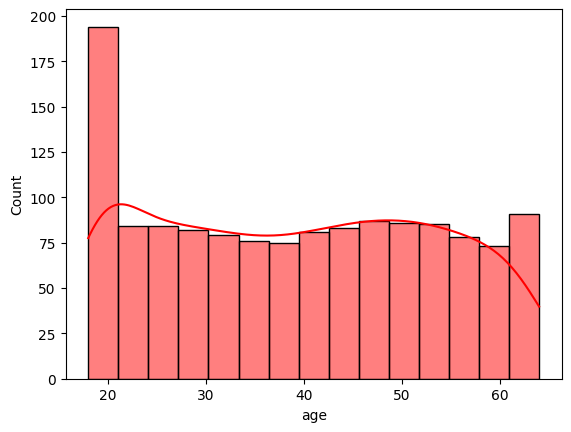

In [5]:
sns.histplot(df['age'], kde=True, bins=15,color='red')

aqui pode se observar que maiior part da população esta nos entre 18 e 23

In [6]:
df["categoria_bmi"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, float("inf")],
    labels=["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade"]
)

<Axes: xlabel='age', ylabel='charges'>

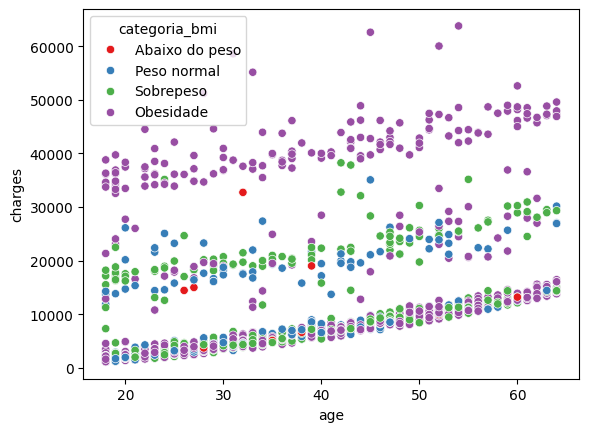

In [7]:
sns.scatterplot(x='age', y='charges', data=df,hue='categoria_bmi',palette='Set1')

A pessoa ser obesa ou não   tem muita influencia nas dispesas

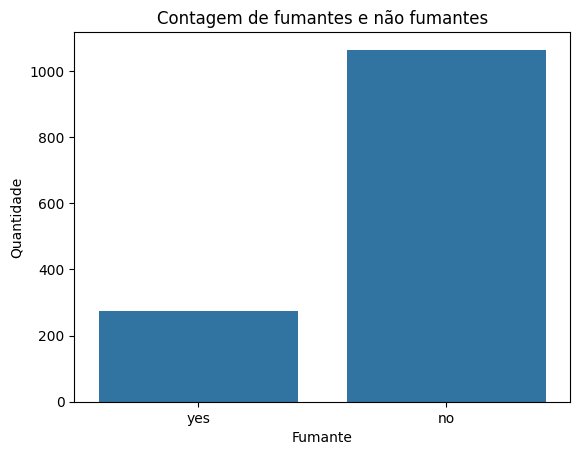

In [8]:
sns.countplot(x='smoker', data=df)
plt.title('Contagem de fumantes e não fumantes')
plt.xlabel('Fumante')
plt.ylabel('Quantidade')
plt.show()

Text(0.5, 1.0, 'Custo médio por fumante e não fumante')

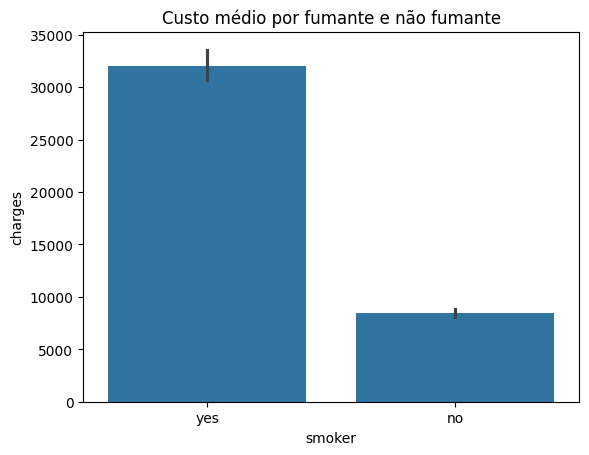

In [9]:
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Custo médio por fumante e não fumante')

hippotese de que o valor pago pelo fumantes e maior do que os que não fuman 
ou seja 
$$
xnf<xyf
$$
$$
h0=xnf=xyf
$$

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,categoria_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,Obesidade
2,28,male,33.000,3,no,southeast,4449.46200,Obesidade
3,33,male,22.705,0,no,northwest,21984.47061,Peso normal
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso


In [ ]:
fum = df[df["smoker"]=="yes"]["charges"]
n_fum = df[df["smoker"]=="no"]["charges"]


p=sts.ttest_ind(fum,n_fum,alternative="greater",equal_var=False).pvalue

if p<0.05:
        print("h0 reijeitado")


h0 reijeitado


de acordo com o pvalor e tenho evdencias estaticas para rejeitar o h0

Os fumantes pagam valores mais altos do que os não fumantes

a interpretação que podemos ter aquie e que basicamente os fumantes por serem um grupo de risco pagam mais, provavemente pelo tratamento de doenças pulmanares

<Axes: xlabel='age', ylabel='charges'>

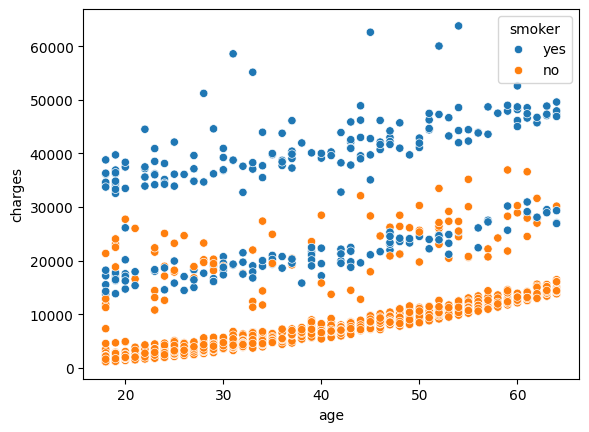

In [12]:
sns.scatterplot(x='age', y='charges', data=df,hue='smoker')

Text(0.5, 1.0, 'Contagem por região')

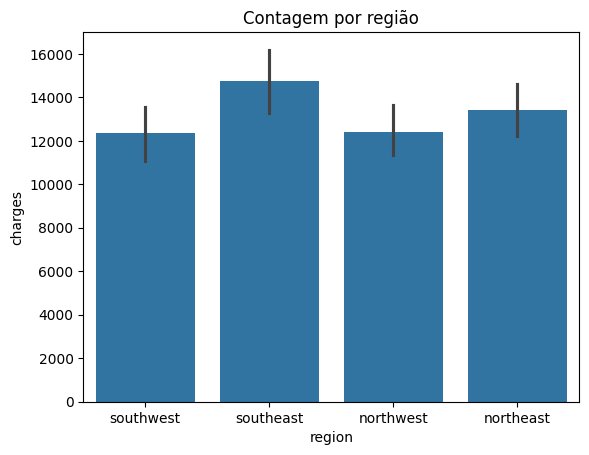

In [4]:
sns.barplot(data=df,x='region', y='charges')
plt.title('Contagem por região')

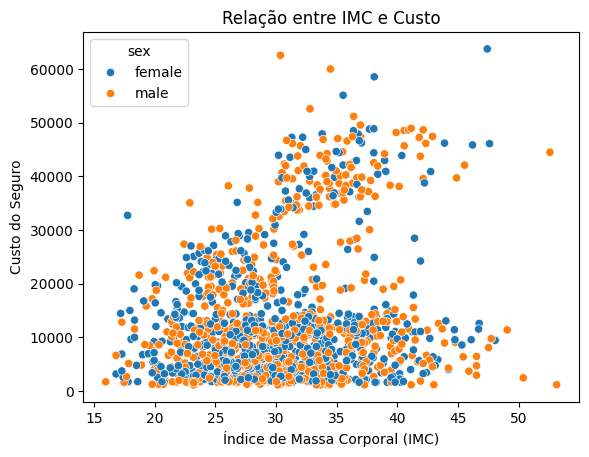

In [8]:
sns.scatterplot(x='bmi', y='charges', data=df,hue="sex")
plt.title('Relação entre IMC e Custo')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Custo do Seguro')
plt.show()

A hipotese que gerei aqui e de que existe uma correlação entre as duas colunas porém baixa entre as duas variaveis 
$$
h0:r=0
$$
$$

h1:r \neq 0
$$

In [5]:
r,p=sts.pearsonr(df["children"],df["charges"])

print(r)
print(p)

0.06799822684790467
0.012852128520136508


### Interpretação da Correlação  

Embora o coeficiente de correlação (r) seja diferente de zero, o valor encontrado é extremamente baixo, indicando uma associação muito fraca entre as variáveis.  

Além disso, o p-valor obtido é maior do que o nível de significância adotado (ex.: 0,05), o que significa que não há evidência estatística suficiente para confirmar essa relação.  

 Em outras palavras, mesmo que r ≠ 0, a correlação não é estatisticamente significativa e não pode ser considerada uma relação confiável no contexto populacional.


<Axes: xlabel='children', ylabel='charges'>

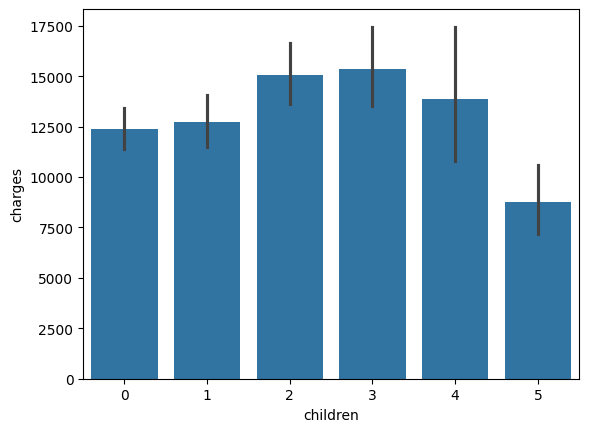

In [7]:
sns.barplot(data=df,x='children',y="charges")

# Conclusão 
r realmente e diferente de 0 (rejeitamos h0 ) porém revela uma relção muito fraca 

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,categoria_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,Obesidade
2,28,male,33.000,3,no,southeast,4449.46200,Obesidade
3,33,male,22.705,0,no,northwest,21984.47061,Peso normal
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso


<Axes: >

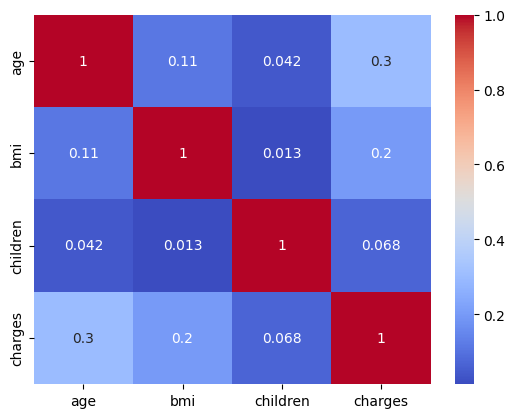

In [17]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')

suspeita de que children não afeta nas dipesas medicas  siganificativamente
$$
h0:r=0
$$
$$

h1:r \neq 0
$$

In [ ]:
r,p=sts.pearsonr(df["bmi"],df["charges"])

print(r)
print(p)

In [18]:



def my_statistic(data):
    return np.mean(data)


res = sts.bootstrap(
    data=(df["charges"].to_numpy(),),
    statistic=my_statistic,
    confidence_level=0.95,
    n_resamples=1000,
    method="percentile",
    random_state=42
)

low, high = res.confidence_interval

print("Média amostral:", df["charges"].mean())
print("IC 95% Bootstrap:", res.confidence_interval)


Média amostral: 13270.422265141257
IC 95% Bootstrap: ConfidenceInterval(low=12672.5627416267, high=13922.12919018645)


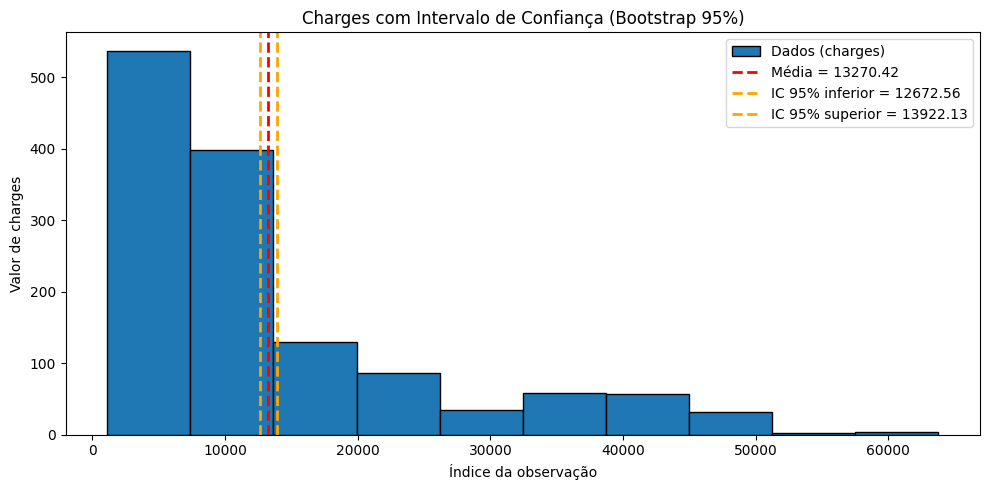

In [ ]:
media = df["charges"].mean()

plt.figure(figsize=(10,5))
plt.hist(df["charges"], label="Dados (charges)",edgecolor="black")
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Média = {media:.2f}")
plt.axvline(low, color="orange", linestyle="--", linewidth=2, label=f"IC 95% inferior = {low:.2f}")
plt.axvline(high, color="orange", linestyle="--", linewidth=2, label=f"IC 95% superior = {high:.2f}")

plt.title("Charges com Intervalo de Confiança (Bootstrap 95%)")
plt.xlabel("valor")
plt.ylabel("numero de dispesas naqule valor")
plt.legend()
plt.tight_layout()
plt.show()

O numero de criancas provavelmente nao esta afetando nas dispesas 

# processamento de dados

In [20]:
x= df.iloc[:,0:6]
y= df.iloc[:,6]

In [21]:
x_categorical = x.select_dtypes(include=['object'])

x_categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [22]:
encoder = OneHotEncoder( handle_unknown='ignore')
x_encoded = encoder.fit_transform(x_categorical)

categorical_cols = ["sex", "smoker", "region"]

x_encoded = pd.DataFrame(
    x_encoded.toarray(),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=x.index
)



x = pd.concat([x.drop(columns=categorical_cols), x_encoded], axis=1)


x.head()

joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [23]:
x.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Rodada 1/30
Rodada 2/30
Rodada 3/30
Rodada 4/30
Rodada 5/30
Rodada 6/30
Rodada 7/30
Rodada 8/30
Rodada 9/30
Rodada 10/30
Rodada 11/30
Rodada 12/30
Rodada 13/30
Rodada 14/30
Rodada 15/30
Rodada 16/30
Rodada 17/30
Rodada 18/30
Rodada 19/30
Rodada 20/30
Rodada 21/30
Rodada 22/30
Rodada 23/30
Rodada 24/30
Rodada 25/30
Rodada 26/30
Rodada 27/30
Rodada 28/30
Rodada 29/30
Rodada 30/30

--- Resultados Médios ---
RandomForest    | R²: 0.8399 | RMSE: 4755.4762
SVM             | R²: 0.3698 | RMSE: 9563.8585
XGBoost         | R²: 0.8378 | RMSE: 4784.1061
Regressão Linear | R²: 0.7412 | RMSE: 6079.5749


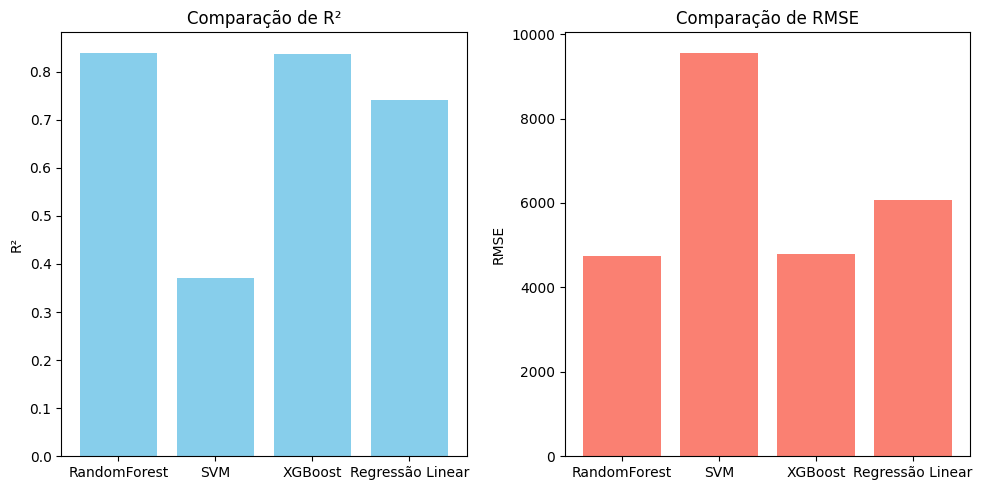

In [26]:

modelos = {
    "RandomForest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVM": SVR(kernel="rbf", C=100, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42),
    "Regressão Linear": LinearRegression()
}


resultados = {nome: {"r2": [], "rmse": []} for nome in modelos.keys()}


for i in range(30):
    print(f"Rodada {i+1}/30")
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    for nome, modelo in modelos.items():
        scores = cross_validate(
            modelo, x_scaled, y,
            cv=kfold,
            scoring=["r2", "neg_root_mean_squared_error"]
        )
        resultados[nome]["r2"].append(scores["test_r2"].mean())
        resultados[nome]["rmse"].append(-scores["test_neg_root_mean_squared_error"].mean())


medias_r2 = {nome: np.mean(val["r2"]) for nome, val in resultados.items()}
medias_rmse = {nome: np.mean(val["rmse"]) for nome, val in resultados.items()}

print("\n--- Resultados Médios ---")
for nome in modelos.keys():
    print(f"{nome:15} | R²: {medias_r2[nome]:.4f} | RMSE: {medias_rmse[nome]:.4f}")

plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.bar(medias_r2.keys(), medias_r2.values(), color="skyblue")
plt.title("Comparação de R²")
plt.ylabel("R²")


plt.subplot(1,2,2)
plt.bar(medias_rmse.keys(), medias_rmse.values(), color="salmon")
plt.title("Comparação de RMSE")
plt.ylabel("RMSE")

plt.tight_layout()
plt.show()


por esses resultados irei cortar o algoritmo svm do treino para salvar pelo fato de sua performace ser insatifatoria 

In [27]:
arvore = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
xgboost= XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
Regressao_linear= LinearRegression()

arvore.fit(x_scaled,y)
xgboost.fit(x_scaled,y)
Regressao_linear.fit(x_scaled,y)

joblib.dump(arvore,"random_forest.pkl")

joblib.dump(xgboost,"XGboost.pkl")

joblib.dump(Regressao_linear,"regressão_linear.pkl")


['regressão_linear.pkl']

# conclusão
---

## 3. Análise Exploratória de Dados (EDA)  

### 3.1 Estrutura dos Dados  
- **Colunas verificadas:** `age`, `sex`, `bmi`, `children`, `smoker`, `region`, `charges`.  
- **Dados ausentes:** Nenhum valor nulo encontrado.  
- **Tipos de dados:** Variáveis numéricas (idade, bmi, charges) e categóricas (sexo, região, fumante).

### 3.2 Distribuição das Idades  
📊 A maioria da população analisada está na faixa de **18 a 23 anos**.  

### 3.3 Índice de Massa Corporal (BMI)  
Foi criada a variável `categoria_bmi` com quatro grupos:  
- Abaixo do peso  
- Peso normal  
- Sobrepeso  
- Obesidade  

### 3.4 Relação Idade+categoria bmi x Custos Médicos  
- O gráfico de dispersão indica que **a obesidade aumenta consideravelmente os custos médicos**.  
- Existe também crescimento dos custos conforme a idade.  

### 3.5 Relação numero de crianças x Custos Médicos  
-O grafico de barras demonstra um relativo aumento ate o 4 orém draticamente no 5  
- r e diferente de 0 poém baixo demais para considerarmos a correlação

### 3.6 Relação bmi(puro)+sexo x Custos Médicos  
-O grafico de dispersão mostra uma correlação entre sexo e dispesas quase inxistate devio a dispersão entre um registro e outro
-teste de hipotese mostrou uma corelçao fraca entre bmi e dispesas

---

## 4. Metodologia de Modelagem  

### 4.1 Pré-processamento  
- Escalonamento de variáveis numéricas com **MinMaxScaler**.  
- Codificação de variáveis categóricas com **OneHotEncoder**.  

### 4.2 Modelos Avaliados  
- **Regressão Linear**  
- **Random Forest Regressor**  
- **XGBoost Regressor**  
- **Suporte Vetorial (SVR)**  

### 4.3 Validação    
- Cross-validation com **KFold** para maior robustez.  

---

## 5. Métricas de Avaliação  
As métricas escolhidas foram:  

- ✅ **RMSE (Root Mean Squared Error):** Mede o erro médio das previsões na mesma escala do target.  
- ✅ **R² (Coeficiente de Determinação):** Mede a proporção da variância explicada pelo modelo.  

---

## 6. Resultados Preliminares  
- A regressão linear fornece um baseline inicial.  
- Modelos mais complexos, como **Random Forest** e **XGBoost**, tendem a capturar melhor as relações não lineares, resultando em maior desempenho.  
- O impacto de ser fumante ou obeso é **altamente significativo** nos custos (`charges`).  

---

## 7. avaliação final 
- O dataset é adequado para estudos de regressão e apresenta forte potencial para análise de fatores de risco em saúde.  
- O **EDA mostrou padrões claros**: idade, obesidade e tabagismo são fatores determinantes nos custos.  
- Modelos de machine learning, com resultados boms para a previsão de custos.
-testes de hipotese importante para estabelecer a teoria de que a media pagar por fumantes e maior que os não fumantes,e tambem pecerber que a relação entere o bmi puro é as dispesas e baixa
- intervalo de confiança para analisar a distribuiçaõ das dispesas  

---
